<a href="https://colab.research.google.com/github/chrisart10/DeepLearning.ai-Summary/blob/master/game/notebook/machine_learning_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actualizaciones, Metas e Ideas

Actualizaciones
1.   Callback Checkpoint
2.   Codigo mejorado
3.   Tensorflow hub Transfer learning 
Metas


1.   Probar otros modelos mediante transferlearning
2.   Implementar K fold cross validation 

Ideas


1.   Elemento de lista
2.   Elemento de lista




# Dashboard
Excel

[Model annotation](https://utpac-my.sharepoint.com/:x:/g/personal/christian_espinoza_utp_ac_pa/EdTa_8urnqNBnOVny2e3jKkBb82MqMWNNa2Y82hJQmINvQ?e=FiJ75A)

# Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import zipfile
from google.colab import files
import matplotlib.pyplot as plt
import tensorflow as tf
from contextlib import redirect_stdout
import tensorflow_hub as hub

# Open dataset from colab

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Import Dataset from kaggle

In [3]:
! pip install -q kaggle

In [4]:
#kaggle.json key
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chrisart10","key":"a4d7a5ccdb579a3da96cba78228ec9c6"}'}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# kaggle dataset API

API fruits fresh and rotten dataset

In [ ]:
# !kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

API skin cancer mnist dataset

In [ ]:
# !kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

API skin cancer mnist dataset organized

In [ ]:
#!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

skin-cancer9-classesisic.zip: Skipping, found more recently modified local copy (use --force to force download)


aruto hand sign dataset

In [6]:
!kaggle datasets download -d vikranthkanumuru/naruto-hand-sign-dataset

100% 2.02G/2.02G [00:21<00:00, 36.0MB/s]
100% 2.02G/2.02G [00:21<00:00, 102MB/s] 


# Extract zip

In [7]:
local_zip = "/content/naruto-hand-sign-dataset.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
!rm /content/naruto-hand-sign-dataset.zip
del local_zip, zip_ref

# Hyperparameters

[Batch selection](https://www.youtube.com/watch?v=-_4Zi8fCZO4) Video



```
n = [2**5,2**6,2**7,2**8,2**9] 
batch = n[0]
```



In [8]:
height = width = 224
channel = 3
input_shape = tf.keras.Input((height,width,channel),name="Input_model")
input = (height,width,channel) 
batch = 2**6
(input,batch)

((224, 224, 3), 64)

# Image data proccessing



## Documentation

[ImageDataPreprocessing Keras Documentation](https://keras.io/api/preprocessing/image/)

[ImageDataPreprocessing TF documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

[Youtube Tutorial](https://youtu.be/q7ZuZ8ZOErE)

In [16]:
# Define our example directories and files
base_dir = '/tmp/Pure Naruto Hand Sign Data'
train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'test')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    # classes=[],
                                                    color_mode="rgb",
                                                    batch_size = batch,
                                                    shuffle=True,
                                                    class_mode = 'categorical',
                                                    target_size = (height, width))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  valid_datagen.flow_from_directory( validation_dir,
                                                        #  classes=["freshapples],
                                                         color_mode="rgb",
                                                         batch_size  = batch,
                                                          shuffle=True,
                                                         class_mode  = 'categorical', 
                                                         target_size =  (height, width))

Found 2159 images belonging to 13 classes.
Found 86 images belonging to 13 classes.


In [17]:
#info
print(train_generator.class_indices)
print(train_generator.class_mode)
print(train_generator.image_shape)
print(train_generator.batch_size)

{'bird': 0, 'boar': 1, 'dog': 2, 'dragon': 3, 'hare': 4, 'horse': 5, 'monkey': 6, 'ox': 7, 'ram': 8, 'rat': 9, 'snake': 10, 'tiger': 11, 'zero': 12}
categorical
(224, 224, 3)
64


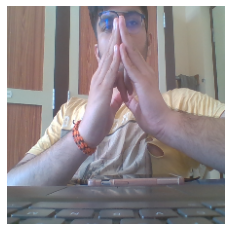

In [15]:
def plot_image(img):
  """
  plot grid of images.
  """
  #reads content using file path
  img = tf.io.read_file(img)
  #decodes file to jpeg and set up channel to a 3 dimension.
  img = tf.image.decode_jpeg(img, channels=3)
  #Convert image to dtype, scaling its values if needed.
  img = tf.image.convert_image_dtype(img, tf.float32) 
  # resizes image
  img = tf.image.resize(img, (width,height))
  plt.imshow(img)
  plt.axis("off")
  plt.show()

plot_image("/tmp/Pure Naruto Hand Sign Data/test/bird/bird_IMG_0a5ad922e-4d58-11ea-b58b-0242ac1c0002.jpg")

# Transfer learning

## Option1

In [ ]:
URL = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
inception_path = tf.keras.utils.get_file("inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5", 
                               origin= URL, 
                               extract=False,
                               cache_dir = "/content")
inception_path

87916544/87910968 [==============================] - 1s 0us/step


'/content/datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
URL ="http://download.tensorflow.org/models/mobilenet_v1_2018_08_02/mobilenet_v1_1.0_224.tgz"
mobilenet_path = tf.keras.utils.get_file("mobilenet_v1_1.0_224.h5", 
                               origin= URL, 
                              untar=True)
mobilenet_path

94322688/94321559 [==============================] - 1s 0us/step


'/root/.keras/datasets/mobilenet_v1_1.0_224.h5'

In [ ]:
def transfer_model(input,path,layer_top='mixed7'):
  """
  Architecture:
  - inception_v3. only take until mixed7
  - Freeze top layers
  """
  local_wieght_file = path
  input = normalization(input)
  pre_trained_model = tf.keras.applications.InceptionV3(input_tensor=input,input_shape=None,
                                                         include_top=False,
                                                         weights=None,
                                                        )
  
  pre_trained_model.load_weights(local_wieght_file)
  
  for layer in pre_trained_model.layers:
    layer = False
  last_layer = pre_trained_model.get_layer(layer_top)
  print('last layer output shape: ', last_layer.output_shape)
  return  pre_trained_model.input,last_layer.output

In [ ]:
def base_model(input_shape):
  """
  Architecture:
  -
  """
  base_model = transfer_model()
  # Flatten the output layer to 1 dimension
  layer = tf.keras.layers.Flatten(name="Flatten_bottom")(base_model)
  # Add a fully connected layer with 1,024 hidden units and ReLU activation
  layer = tf.keras.layers.Dense(2000,kernel_regularizer='l2', activation='relu')(layer)
  # Add a dropout rate of 0.2
  layer = tf.keras.layers.Dropout(0.5)(layer)
  # Add a fully connected layer with 1,024 hidden units,kernel_regularization"L2" and ReLU activation
  layer = tf.keras.layers.Dense(1024, kernel_regularizer='l2',activation="relu")(layer)             
  # Add a dropout rate of 0.2
  layer = tf.keras.layers.Dropout(0.2)(layer)
  # Add a final sigmoid layer for classification -- OUtPUT
  output_layer = tf.keras.layers.Dense(13, activation='softmax')(layer)           
  print("ouput layer shape: ", output_layer.shape)
  model = tf.keras.Model(input_shape, output_layer,name="A1") # changes model name 
  with open('modelsummary.txt', 'w') as f: 
      with redirect_stdout(f):
          model.summary()
      
  tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True,to_file="modelA1.png")
  return model

## Option2
Tensorflow Hub

[tensorflow hub image models](https://tfhub.dev/s?module-type=image-augmentation,image-classification,image-classification-logits,image-classifier,image-feature-vector,image-generator,image-object-detection,image-others,image-pose-detection,image-segmentation,image-style-transfer,image-super-resolution,image-rnn-agent&tf-version=tf2)


[hub keras layer](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer)

In [18]:
def transfer_model(input):
  """
  """
  url = "https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/classification/5"
  top = hub.KerasLayer(url,trainable=False,input_shape=input,name="mobilenet_v3_small_100_224"	)
  return top

In [19]:
def base_model_sequential(input):
  top = transfer_model(input)
  model = tf.keras.Sequential([
                               top,
                               tf.keras.layers.Dense(2000,kernel_regularizer='l2', activation='relu',name="Dense_layer1"),
                               tf.keras.layers.Dropout(0.5,name="dropout_layer1"),
                               tf.keras.layers.Dense(1024, kernel_regularizer='l2',activation="relu",name="Dense_layer2"),
                               tf.keras.layers.Dropout(0.2,name="dropout1_layer2"),
                               tf.keras.layers.Dense(13, activation='softmax',name="softmax_layer")
                               ])
  # model.build([None, 224,224, 3])
  with open('modelsummary.txt', 'w') as f: 
      with redirect_stdout(f):
          model.summary()
  tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True,to_file="modelA1.png")
  return model

# Model

Option 1

In [ ]:
model = base_model(input_shape)

Option 2

In [20]:
model = base_model_sequential(input)

# Callbacks API 
[Callbacks Keras Documentation](https://keras.io/api/callbacks)

[Callbacks TF Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks)



## Callback Checkpoint

In [ ]:
# checkpoint_filepath = '/tmp/checkpoint'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

# # Model weights are saved at the end of every epoch, if it's the best seen
# # so far.
# model.fit(epochs=EPOCHS, callbacks=[model_checkpoint_callback])

# #  The model weights (that are considered the best) are loaded into the model.
# model.load_weights(checkpoint_filepath)


## Early stopping


In [22]:
stop_acc = 0.94
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') >= stop_acc):
                print("\nReached 98% accuracy so cancelling training!")
                self.model.stop_training = True
callbacks = myCallback()

# Compile 

[tensorflow optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

[tensorflow losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

[tensorflow metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [23]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = tf.keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'), 
              metrics = ['accuracy'])

# Train model

In [24]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs =5,
            callbacks=[callbacks],
            verbose = 1,
            batch_size=batch)

Epoch 1/5
34/34 [==============================] - 97s 2s/step - loss: 30.9831 - accuracy: 0.2192 - val_loss: 19.0707 - val_accuracy: 0.3023
Epoch 2/5
34/34 [==============================] - 65s 2s/step - loss: 16.3815 - accuracy: 0.6448 - val_loss: 14.0227 - val_accuracy: 0.2907
Epoch 3/5
34/34 [==============================] - 65s 2s/step - loss: 11.5615 - accuracy: 0.7462 - val_loss: 10.7793 - val_accuracy: 0.3256
Epoch 4/5
34/34 [==============================] - 65s 2s/step - loss: 8.6817 - accuracy: 0.7521 - val_loss: 8.9966 - val_accuracy: 0.3488
Epoch 5/5
34/34 [==============================] - 65s 2s/step - loss: 6.6811 - accuracy: 0.8018 - val_loss: 7.8493 - val_accuracy: 0.3488


# Learning plot

<Figure size 432x288 with 0 Axes>

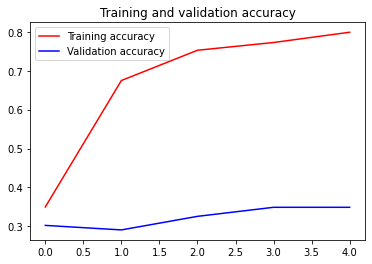

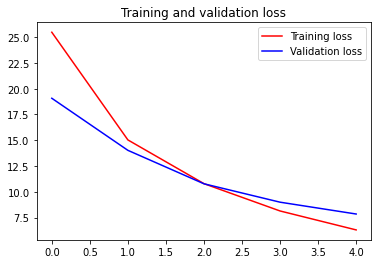

<Figure size 432x288 with 0 Axes>

In [25]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, 'r', label='Training loss')
plt.plot  ( epochs, val_loss, 'b', label='Validation loss')
plt.title ('Training and validation loss'   )
plt.legend(loc=0)
plt.figure()

In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())
with open('history.txt', 'w') as f: 
    with redirect_stdout(f):
        print(hist)

        loss  accuracy   val_loss  val_accuracy  epoch
0  25.469748  0.349699  19.070677      0.302326      0
1  15.032213  0.674849  14.022693      0.290698      1
2  10.792600  0.752663  10.779253      0.325581      2
3   8.144828  0.772580   8.996552      0.348837      3
4   6.308445  0.798981   7.849322      0.348837      4


# Prediction

In [ ]:
from keras.preprocessing import image
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(height, width))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  prediction = model.predict(images)
  print(prediction)
  prediction = np.argmax(prediction, axis=1)
  clasess  = train_generator.class_indices
  classes = list(clasess.keys())
  print(clasess)
  print("Answer : ",classes[int(prediction)])

In [ ]:
h = train_generator.class_indices
key = h.keys()
print(list(key)[1-1])
del h,key

bird


# Tensorboard
comming soon

# Save model option 1

In [ ]:
# import time
# path = '/tmp/simple_keras_model'
# model.save(path)

INFO:tensorflow:Assets written to: /tmp/simple_keras_model/assets


In [ ]:
# new_model = tf.keras.models.load_model('/tmp/saved_models/1612553978/')
# Check its architecture
#new_model.summary()

# Save model option 1

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('/tmp/saved_models/versions/my_model1.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('/tmp/saved_models/versions/my_model1.h5')
# Show the model architecture
new_model.summary()

# Convert .h5 to tfjs format 

In [ ]:
!pip install tensorflowjs

In [ ]:
!tensorflowjs_converter --input_format=keras /content/mask_model.h5 /content/tfjs_model

Combine into one file

In [ ]:
!ls tfjs_model/
!cat tfjs_model/group1-shard1of3.bin  tfjs_model/group1-shard2of3.bin  tfjs_model/group1-shard3of3.bin > tfjs_model/group1-shard.bin

group1-shard1of3.bin  group1-shard3of3.bin  model.json
group1-shard2of3.bin  group1-shard.bion


Alternative: Use the Python API to export directly to TF.js Layers format
If you have a Keras model in Python, you can export it directly to the TensorFlow.js Layers format as follows:



In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, tfjs_target_dir)

**Load the model into TensorFlow.js**

Use a web server to serve the converted model files you generated in Step 1. Note that you may need to configure your server to allow Cross-Origin Resource Sharing (CORS), in order to allow fetching the files in JavaScript.

Then load the model into TensorFlow.js by providing the URL to the model.json file:



In [ ]:
#JavaScript
"""
import * as tf from '@tensorflow/tfjs';

const model = await tf.loadLayersModel('https://foo.bar/tfjs_artifacts/model.json');
"""

# Github command



```
#Example: Contribute to an existing repository
# download a repository on GitHub.com to our machine
git clone https://github.com/me/repo.git

# change into the `repo` directory
cd repo

# create a new branch to store any new changes
git branch my-branch

# switch to that branch (line of development)
git checkout my-branch

# make changes, for example, edit `file1.md` and `file2.md` using the text editor

# stage the changed files
git add file1.md file2.md

# take a snapshot of the staging area (anything that's been added)
git commit -m "my snapshot"

# push changes to github
git push --set-upstream origin my-branch
```



# Linux command

```
File Commands
List files in the directory:
!ls

#List all files (shows hidden files):
!ls -a

#show directory you are currently working in:
!pwd

#Create a new directory:
!mkdir [directory]

#Remove a file:
!rm [file_name] 

#Remove a directory recursively:
!rm -r [directory_name]

#Recursively remove a directory without requiring confirmation:
!rm -rf [directory_name]

#Copy the contents of one file to another file:
!cp [file_name1] [file_name2]

#Recursively copy the contents of one file to a second file:
!cp -r [directory_name1] [directory_name2]

#Rename [file_name1] to [file_name2] with the command:
!mv [file_name1] [file_name2]

#Create a symbolic link to a file:
!ln -s /path/to/[file_name] [link_name]

#Create a new file:
!touch [file_name]

#Show the contents of a file:
!more [file_name]

#or use the cat command:
!cat [file_name]

#Append file contents to another file:
!cat [file_name1] >> [file_name2]

#Display the first 10 lines of a file with:
!head [file_name]

#Show the last 10 lines of a file:
!tail [file_name]
```
[more command](https://phoenixnap.com/kb/linux-commands-cheat-sheet)
